Title: Data analysis of the songs that make it to the
Grammys every year in the categories Record of
the year and Song of the year


---


Group number: 15


---


Team members with their roll numbers:


---


### 22B4211 Utprabh Pama
### 22B4224 Vaibhav Chand
### 22B4208 Udbhav Rana
### 22B4221 Jaydip Damor
### 22B4214 Samarth Sanganeria
### 22B4210 Sameer Atreya

---


Link the video : https://drive.google.com/drive/folders/1gseCdmI4vb16x1UvdS142Ywet6GN1tH2?usp=sharing


---


Links and information on the dataset used :

Reference 1: https://www.grammy.com/awards

Reference 2: https://imusician.pro/en/resources/blog/does-the-song-length-matter#:~:text=Nowadays%2C%20songs%20average%20around%203,by%20up%20to%2060%20seconds.

#Analysis of Random Variables and visual representation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("AE-248(G-15).xlsx")

print("First few rows of the dfset:")
print(df.head())

print("\nShape of the dfset:")
print(df.shape)

print("\ndf types of each column:")
print(df.dtypes)

print("\nMissing values in the dfset:")
print(df.isnull().sum())

print("\nSummary statistics of numerical columns:")
print(df.describe())

First few rows of the dfset:
                                           Song name    length Genre  bpm  \
0                    "Not Strong Enough" - boygenius  03:54:00  Rock  126   
1  "What Was I Made For? [From The Motion Picture...  03:42:00   Pop   78   
2                         "vampire" - Olivia Rodrigo  03:39:00   Pop  138   
3                      "On My Mama" - Victoria Monét  03:37:00   R&B  153   
4                            "Worship" - Jon Batiste  04:13:00   Pop  124   

  release month       Key billboard debut billboard peak  spotify streams  \
0          March  D major              17              1        118530901   
1           July  C major              98             14        824999328   
2           june  F major               1              1        936542376   
3           June  E minor               1              1        110111645   
4         August  F minor             198             54          2959736   

                what is it about in a few wor

In [ ]:
# Convert the 'length' column to strings
df['length'] = df['length'].astype(str)

# Split the string into minutes and seconds
split_length = df['length'].str.split(':', expand=True)

# Convert minutes and seconds to integers, handling missing values
minutes = pd.to_numeric(split_length[0], errors='coerce')
seconds = pd.to_numeric(split_length[1], errors='coerce')

# Replace missing values with zeros (or any other suitable value)
minutes.fillna(0, inplace=True)
seconds.fillna(0, inplace=True)

# Convert minutes and seconds to total seconds
df['length'] = minutes * 60 + seconds

print(df.length)

0     234
1     222
2     219
3     217
4     253
     ... 
91    206
92    284
93    176
94    250
95    241
Name: length, Length: 96, dtype: int64


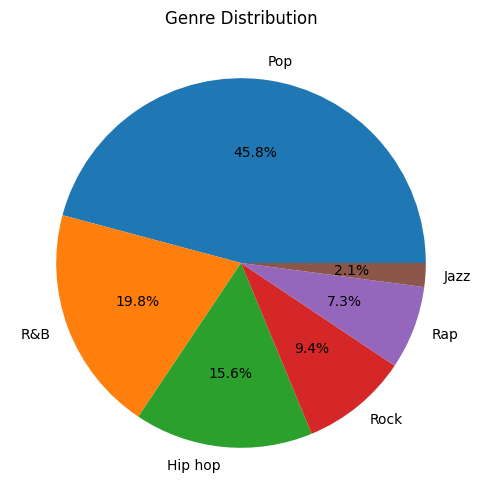

In [ ]:
#Genre Distribution

genre_counts = df['Genre'].value_counts()

plt.figure(figsize=(8, 6))
genre_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.tab10.colors)

plt.title('Genre Distribution')
plt.ylabel('')  # Removing the y-label

plt.show()

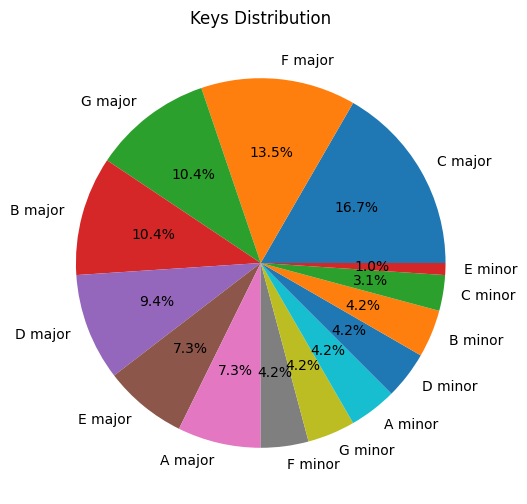

In [ ]:
#Key Distribution

genre_counts = df['Key'].value_counts()

plt.figure(figsize=(8, 6))
genre_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.tab10.colors)

plt.title('Keys Distribution')
plt.ylabel('')  # Removing the y-label

plt.show()

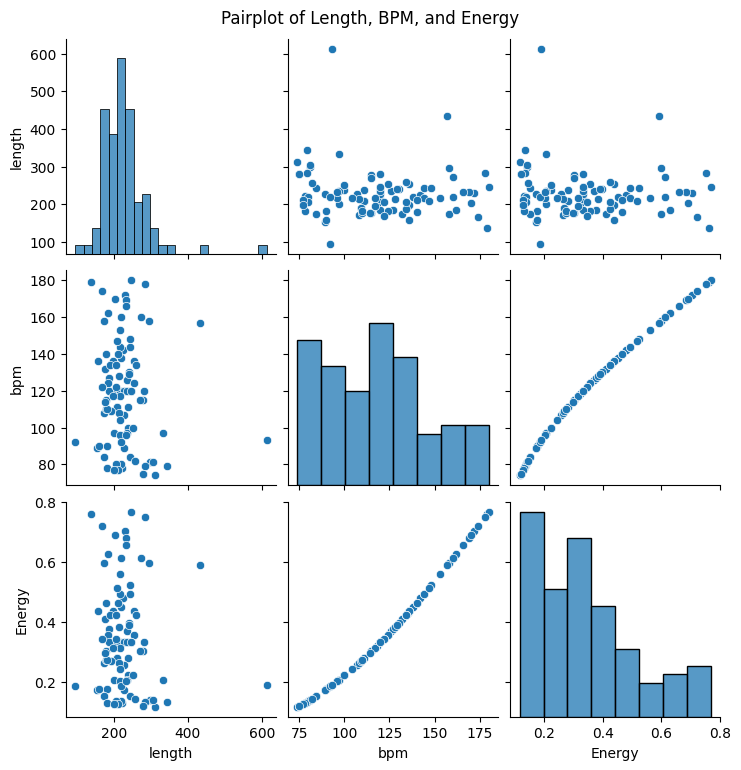

In [ ]:
#pair plot of Length, BPM and Energy

sns.pairplot(df[['length', 'bpm', 'Energy']])
plt.suptitle('Pairplot of Length, BPM, and Energy', y=1.02)
plt.show()

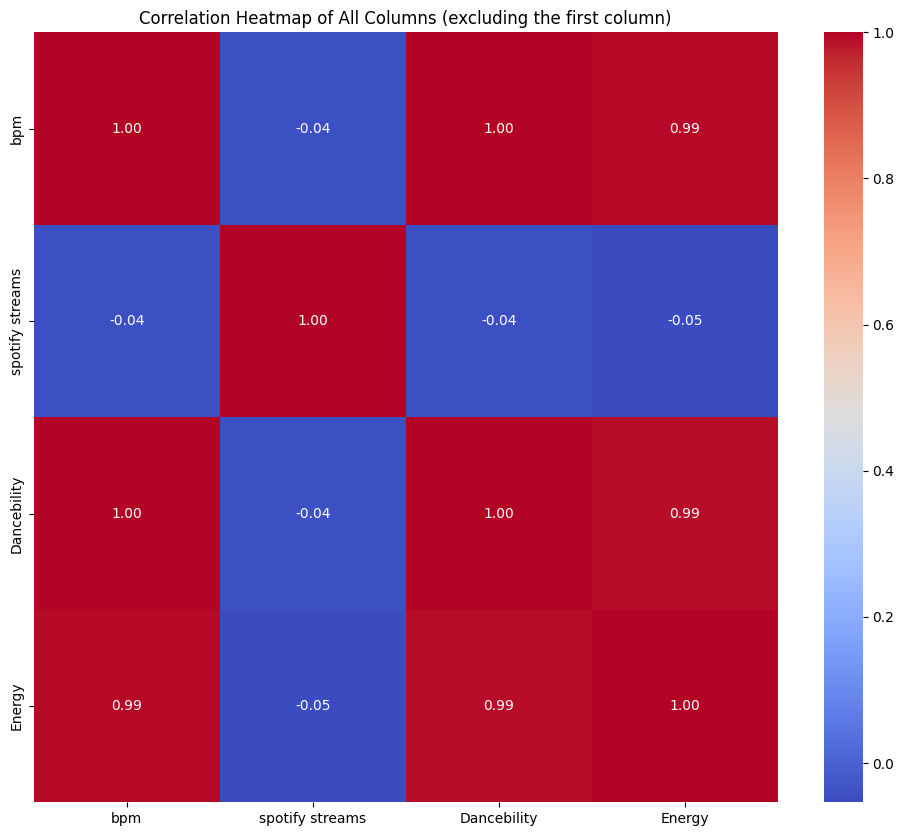

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude the first column (as it is string)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).iloc[:, 1:].columns

correlation_matrix = df[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of All Columns (excluding the first column)')
plt.show()


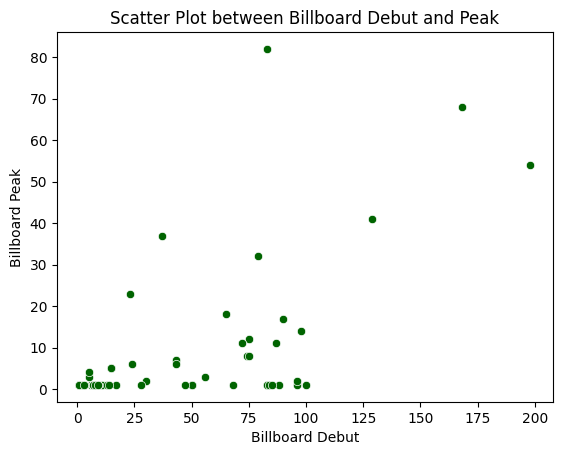

In [ ]:
# Scatter plot between Billboard Debut and Peak

df.replace('-', pd.NA, inplace=True)
sns.scatterplot(data=df, x='billboard debut', y='billboard peak',color='#006400')
plt.xlabel('Billboard Debut')
plt.ylabel('Billboard Peak')
plt.title('Scatter Plot between Billboard Debut and Peak')
plt.show()

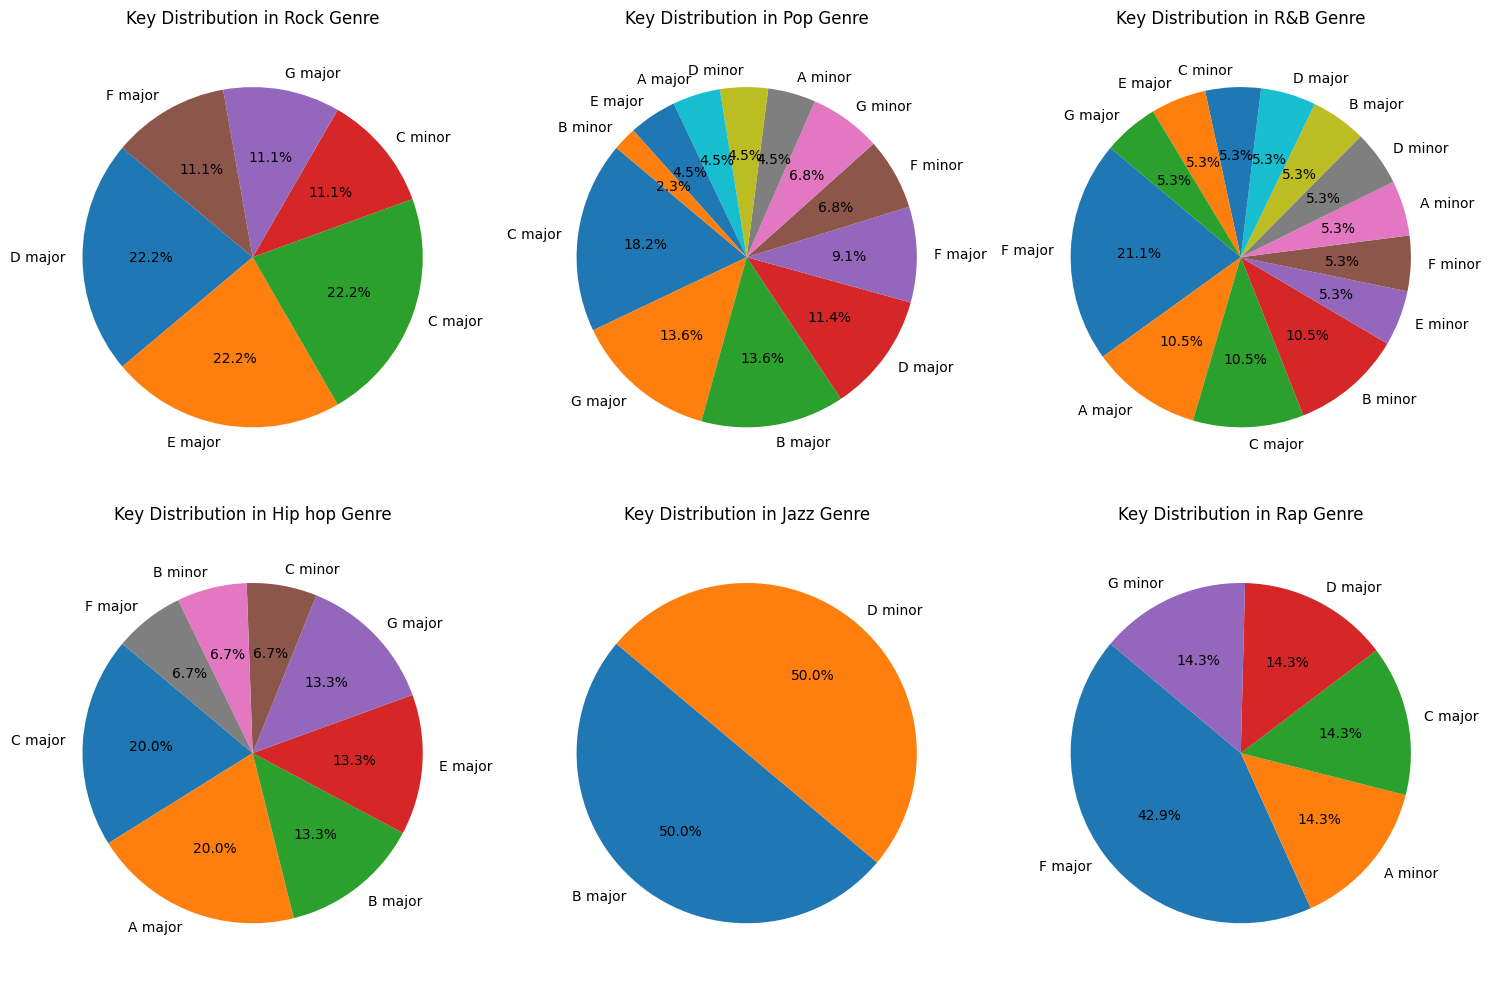

In [ ]:
#Key Distribution in each Genre'

# To get unique genres in the dataset
unique_genres = df['Genre'].unique()

# Create subplots for each genre
num_plots = len(unique_genres)
num_cols = 3
num_rows = -(-num_plots // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()  # Flatten axes for easy iteration

for i, genre in enumerate(unique_genres):
    genre_songs = df[df['Genre'] == genre]

    key_distribution = genre_songs['Key'].value_counts()

    ax = axes[i]
    ax.pie(key_distribution, labels=key_distribution.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Key Distribution in {genre} Genre')
    ax.axis('equal')

plt.tight_layout()
plt.show()


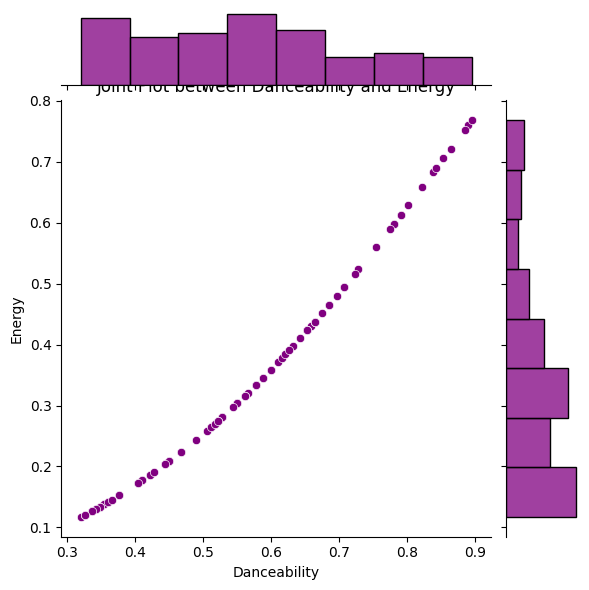

In [ ]:
# Joint plot between Danceability and Energy

sns.jointplot(data=df, x='Dancebility', y='Energy', color='purple')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Joint Plot between Danceability and Energy')
plt.show()

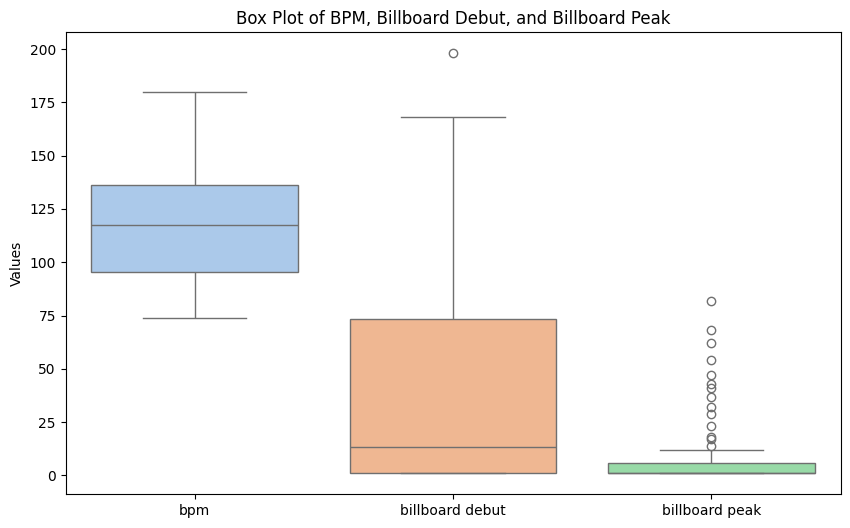

In [ ]:
# Box plot for 'BPM', 'Billboard debut', and 'Billboard peak' columns
plt.figure(figsize=(10, 6))

sns.boxplot(data=df[['bpm', 'billboard debut', 'billboard peak']], palette='pastel')
plt.title('Box Plot of BPM, Billboard Debut, and Billboard Peak')
plt.ylabel('Values')

plt.show()

<ipython-input-118-2f6e0401dd6b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='bpm', data=df, palette='Set3')


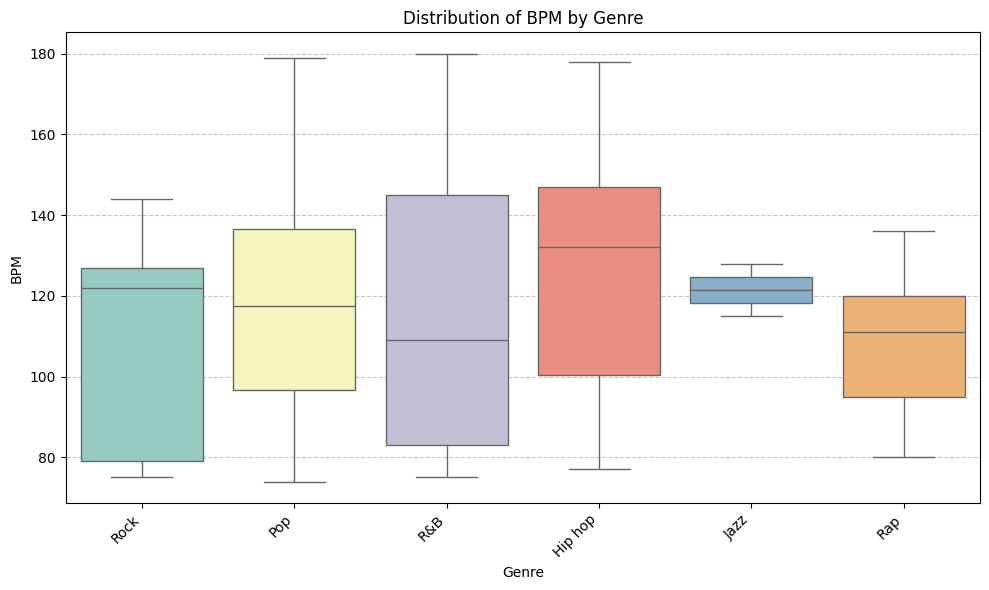

In [ ]:
# Distribution of BPM by Genre

plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='bpm', data=df, palette='Set3')
plt.title('Distribution of BPM by Genre')
plt.xlabel('Genre')
plt.ylabel('BPM')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

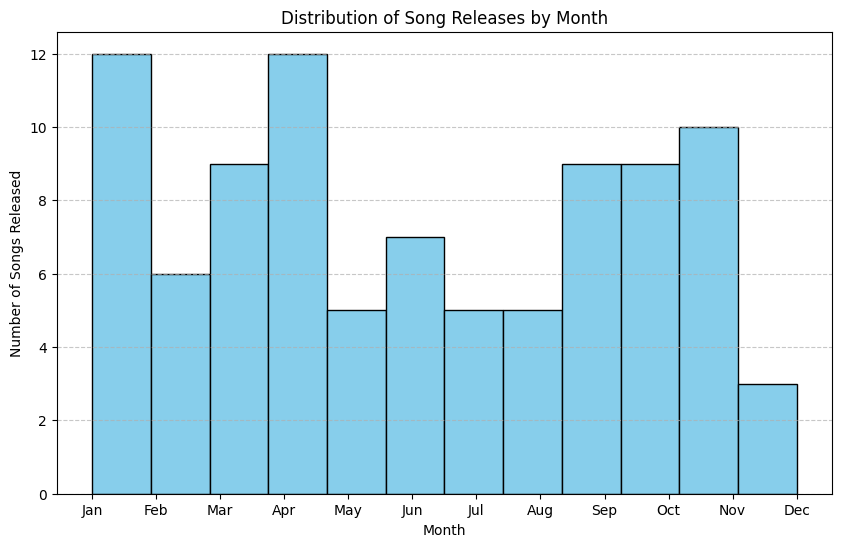

In [ ]:
# Histogram Distribution of Song Releases by Month

# Defining a dictionary to map month names to numerical values
month_to_num = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

df['release month '] = df['release month '].map(month_to_num)

plt.figure(figsize=(10, 6))
plt.hist(df['release month '], bins=12, color='skyblue', edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Number of Songs Released')
plt.title('Distribution of Song Releases by Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


#Fit distributions for random variables

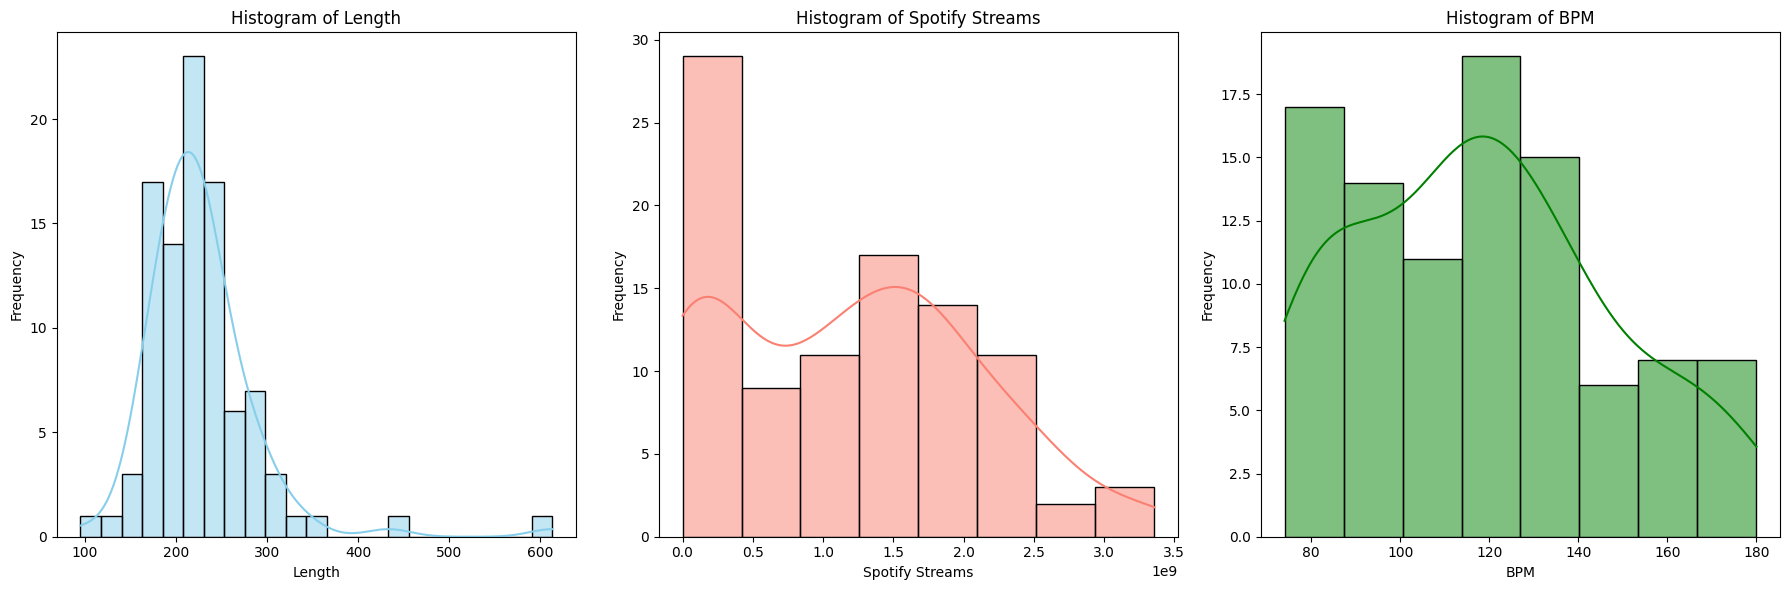

In [ ]:
# Histograms for the 'Length', 'Spotify streams', and 'BPM' columns
plt.figure(figsize=(18, 6))

# Histogram for 'Length'
plt.subplot(1, 3, 1)
sns.histplot(data=df['length'], kde=True, color='skyblue')
plt.title('Histogram of Length')
plt.xlabel('Length')
plt.ylabel('Frequency')

# Histogram for 'Spotify streams'
plt.subplot(1, 3, 2)
sns.histplot(data=df['spotify streams'], kde=True, color='salmon')
plt.title('Histogram of Spotify Streams')
plt.xlabel('Spotify Streams')
plt.ylabel('Frequency')

# Histogram for 'BPM'
plt.subplot(1, 3, 3)
sns.histplot(data=df['bpm'], kde=True, color='green')
plt.title('Histogram of BPM')
plt.xlabel('BPM')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#Hypothesis testing and Analysis

Hypothesis 1:
Null Hypothesis (H0): There is no significant difference in the average length of Grammy-nominated songs.
Alternative Hypothesis (H1): There is a significant difference in the average length of Grammy-nominated songs.



In [ ]:
import scipy.stats as stats
from scipy.stats import linregress

In [ ]:
hypothetical_mean_length = 210  #mean length in seconds
t_statistic, p_value = stats.ttest_1samp(df['length'], hypothetical_mean_length, nan_policy='omit')

print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Null Hypothesis is rejected: There is a significant difference in the average length of Grammy-nominated songs.")
else:
    print("Null Hypothesis is not rejected: There is no sufficient evidence to conclude that there is a significant difference in the average length of Grammy-nominated songs.")

T-statistic: 2.61585054456059
P-value: 0.010353799378784391
Null Hypothesis is rejected: There is a significant difference in the average length of Grammy-nominated songs.


In [ ]:
df['length'] = pd.to_numeric(df['length'], errors='coerce')

length_seconds = df['length'].dropna()

mean_length = length_seconds.mean()
std_dev = length_seconds.std()
confidence_level = 0.95

# Calculating the degrees of freedom
degrees_of_freedom = len(length_seconds) - 1
# Calculating the margin of error
margin_of_error = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom) * (std_dev / (len(length_seconds) ** 0.5))
confidence_interval = (mean_length - margin_of_error, mean_length + margin_of_error)

print("Confidence Interval for the average length of Grammy-nominated songs:", confidence_interval)

Confidence Interval for the average length of Grammy-nominated songs: (213.98516600511596, 239.07733399488404)


Hypothesis 2:
Null Hypothesis (H0): The average number of Spotify streams for Grammy-nominated songs is less than or equal to 1,000,000.
Alternative Hypothesis (H1): The average number of Spotify streams for Grammy-nominated songs is greater than 1,000,000.

In [ ]:
mean_streams_grammy = df['spotify streams'].mean()
threshold_streams = 1000000

# Performing one-sample t-test to compare the average Spotify streams of Grammy-nominated songs with the threshold
t_statistic, p_value = stats.ttest_1samp(df['spotify streams'], threshold_streams, alternative='greater', nan_policy='omit')
print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Null Hypothesis is rejected: The average number of Spotify streams for Grammy-nominated songs is greater than 1,000,000, providing strong evidence against the null hypothesis.")
else:
    print("Null Hypothesis is not rejected: There is no sufficient evidence to conclude that the average number of Spotify streams for Grammy-nominated songs is greater than 1,000,000.")

T-statistic: 12.715674285452874
P-value: 1.5986493432914598e-22
Null Hypothesis is rejected: The average number of Spotify streams for Grammy-nominated songs is greater than 1,000,000, providing strong evidence against the null hypothesis.


In [ ]:
spotify_streams = df['spotify streams']
mean_streams = spotify_streams.mean()
std_dev = spotify_streams.std()
confidence_level = 0.95
degrees_of_freedom = len(spotify_streams) - 1
margin_of_error = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom) * (std_dev / (len(spotify_streams) ** 0.5))
confidence_interval = (mean_streams - margin_of_error, mean_streams + margin_of_error)
print("Confidence Interval:", confidence_interval)

Confidence Interval: (995237298.8910004, 1363127836.5464997)


Hypothesis 3Null Hypothesis (H0): There is no significant difference in the average energy scores of Grammy-nominated songs across different genres.
Alternative Hypothesis (H1): There is a significantdifference in the average energy scores of Grammy-nominated songs across different genres

In [ ]:
average_energy_by_genre = df.groupby('Genre')['Energy'].mean()
f_statistic, p_value = stats.f_oneway(*[group['Energy'] for name, group in df.groupby('Genre')])
print("F-statistic:", f_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant difference in the average energy scores across different genres.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in the average energy scores across different genres.")

F-statistic: 0.6634719000279622
P-value: 0.652086383795265
Fail to Reject Null Hypothesis: There is no significant difference in the average energy scores across different genres.


In [ ]:
mean_energy_all_songs = df['Energy'].mean()
std_dev_energy_all_songs = df['Energy'].std()
confidence_level = 0.95
n = len(df['Energy'])
std_error_mean_energy = std_dev_energy_all_songs / np.sqrt(n)
margin_of_error = stats.t.ppf((1 + confidence_level) / 2, n - 1) * std_error_mean_energy
confidence_interval = (mean_energy_all_songs - margin_of_error, mean_energy_all_songs + margin_of_error)
print("Confidence Interval for the Mean Energy Score of All Songs:", confidence_interval)

Confidence Interval for the Mean Energy Score of All Songs: (0.3086483753151252, 0.3801796138230675)


#Analysing the relationship between two random Variables

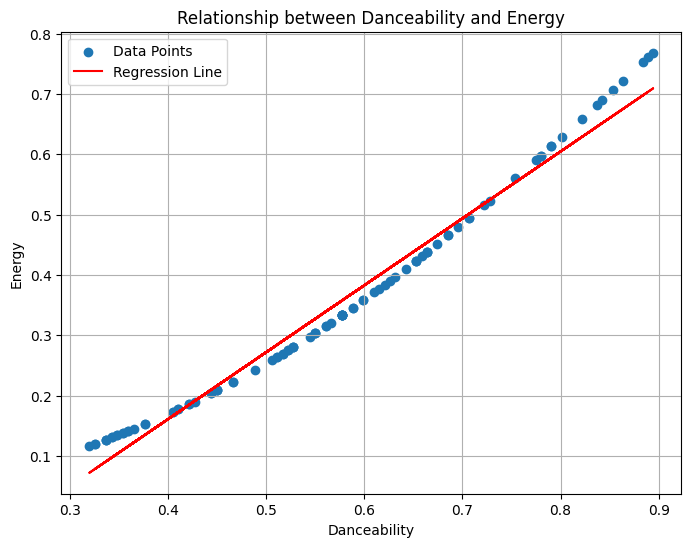

Slope: 1.1100421437688752
Intercept: -0.2832311663533353
R-value (Correlation Coefficient): 0.990092238872918
P-value: 5.975097304680977e-82
Standard Error: 0.016237690198825438


In [ ]:
df_cleaned = df.dropna(subset=['Dancebility', 'Energy'])

# linear regression
slope, intercept, r_value, p_value, std_err = linregress(df_cleaned['Dancebility'], df_cleaned['Energy'])
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['Dancebility'], df_cleaned['Energy'], label='Data Points')
plt.plot(df_cleaned['Dancebility'], slope * df_cleaned['Dancebility'] + intercept, color='red', label='Regression Line')

plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Relationship between Danceability and Energy')
plt.legend()
plt.grid(True)
plt.show()

print("Slope:", slope)
print("Intercept:", intercept)
print("R-value (Correlation Coefficient):", r_value)
print("P-value:", p_value)
print("Standard Error:", std_err)


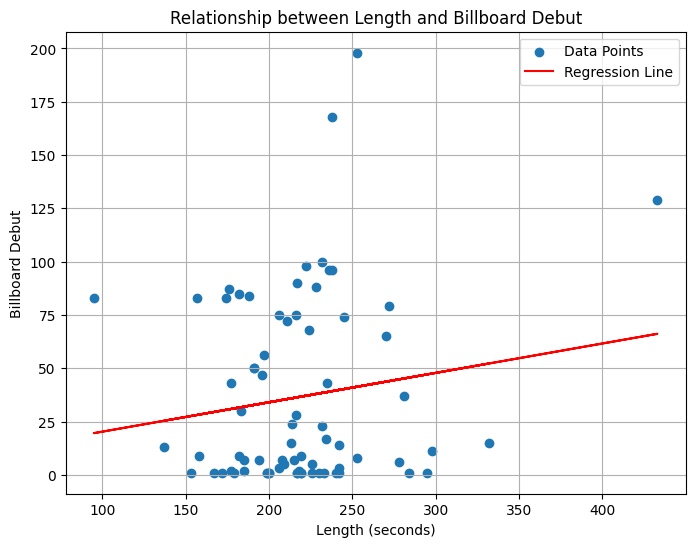

Slope: 0.1378896724146978
Intercept: 6.461018422915597
R-value (Correlation Coefficient): 0.14593004441335142
P-value: 0.21474625526696034
Standard Error: 0.11016573905443051


In [ ]:
df['length'] = pd.to_numeric(df['length'], errors='coerce')
df_cleaned = df.dropna(subset=['length'])
df_cleaned['billboard_debut'] = pd.to_numeric(df_cleaned['billboard debut'], errors='coerce')
df_cleaned = df_cleaned.dropna(subset=['billboard_debut'])

slope, intercept, r_value, p_value, std_err = linregress(df_cleaned['length'], df_cleaned['billboard_debut'])
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['length'], df_cleaned['billboard_debut'], label='Data Points')

plt.plot(df_cleaned['length'], slope * df_cleaned['length'] + intercept, color='red', label='Regression Line')
plt.xlabel('Length (seconds)')
plt.ylabel('Billboard Debut')
plt.title('Relationship between Length and Billboard Debut')
plt.legend()
plt.grid(True)
plt.show()

print("Slope:", slope)
print("Intercept:", intercept)
print("R-value (Correlation Coefficient):", r_value)
print("P-value:", p_value)
print("Standard Error:", std_err)

Overall the work was quite collaborative with each team member having a significant contribution.

---


**Contribution of each teammate:**

---




*   **Vaibhav Chand:** Ideation, data collection and analysis of random variables
*   **Samarth Sanganeria:** Data collection, analysis of random variables and report making
*   **Udbhav Rana:** Analysis of random variable and Fit distribution
*  **Utprabh Pama:** Hypothesis testing and correlation between 2 variables
*  **Jaydip Damor:** Hypothesis testing and correlation between 2 variables
*  **Sameer Atreya:** Conclusion and Report Making






